In [150]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [151]:
mp_key = "iHKrsQ8aWfQ1QaXnodlQAIOBI4QNOfIj"
mp_id = "mp-2784"

In [152]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
XRD = XRDCalculator(1.54060) # Creation du calculateur avec le rayonnement X incident souhaite.
plan = XRD.get_pattern(conv_struc) # Conv_struc pour pouvoir comparer avec les valeurs dans 'The Materials Project'
hkl = plan.hkls # Liste dont chaque element est un dictionnaire avec les plans hkl et leurs multiplicités.
d_hkl = plan.d_hkls # Liste reprennant la distance entre les plans. 

Déterminons les 3 premiers pics de diffraction du Na2Te pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

Lorsqu'un rayonnement X incident est envoyé sur un cristal (ici, du Na2Te), le faisceau est diffracté dù à la présence du réseau d'atome. Les interférences des différents atomes peuvent être constructives ou destructives. Les interférences seront constructives si la condition de Bragg est respectée : n.lambda = 2d.sin(theta), avec d la distance entre les plans, theta l'angle du faisceau par rapport au plan et lambda la longueur d'onde du faiseau incident. À ces angles précis, il résulte des pics de diffractions, possédant une intensité et associés à des plans de diffraction. L'intensité des pics diminue lorsque theta augmente car elle est liée au facteur de forme atomique (qui diminue lorsque theta augmente). Il faut également noter que pour pour certains cristaux, les pics associés à une certaine combinaison 'hkl' peuvent être absents du schéma de diffraction. Il s'agit d'extinctions systématiques. Ces combinaisons 'hkl' induisent un facteur de structure de maille nul, ce qui induit une intensité du pic nulle. Ces combinaisons seront différentes pour chaque système cristallin. L'intensité des pics est également influencée par le nombre de plans équivalents. Si ce nombre augmente, il y a plus de diffraction constructive possible, donc l'intensité augmente.

La distance entre les plans est déterminées par : d = 2pi/|v| avec v = h.a* + k.b* + l.c*

In [156]:
# Prendre les 3 premiers pics. 

for i in range(3) : 
    print("\n---------------------------------")
    print("Pic de diffraction n°" + str(i + 1) +".\n")
    print("2\u03F4 = " + str(round(plan.x[i], 4)) + "°")
    print("Intensité (scaled) = " + str(round(plan.y[i], 4)))
    print("(h,k,l) = " +str(hkl[i][0]['hkl']))
    print("Multiplicité = " + str(hkl[i][0]['multiplicity']))
    print("Distance entre les plans = " + str(round(d_hkl[i], 4)) + " Å")


---------------------------------
Pic de diffraction n°1.

2ϴ = 21.1617°
Intensité (scaled) = 100.0
(h,k,l) = (1, 1, 1)
Multiplicité = 8
Distance entre les plans = 4.195 Å

---------------------------------
Pic de diffraction n°2.

2ϴ = 24.4827°
Intensité (scaled) = 18.84
(h,k,l) = (2, 0, 0)
Multiplicité = 6
Distance entre les plans = 3.633 Å

---------------------------------
Pic de diffraction n°3.

2ϴ = 34.8978°
Intensité (scaled) = 81.2218
(h,k,l) = (2, 2, 0)
Multiplicité = 12
Distance entre les plans = 2.5689 Å


L'ensemble des caractéristiques pour les trois premiers pics de diffractions sont reprises ci-dessus. Il s'agit des caractéristiques déterminées à partir de la maille conventionelle. 
Les données correspondent à celles publiées sur 'The Materials Project'. 
On peut remarquer une certaine logique : l'angle theta et (h^2 + k^2 + l^2)^(1/2) augmentent au fur et à mesure des pics. On peut noter aussi que la distance interplanaire est plus grande que la distance atomique (± 1 Ångström). La visualisation des différents pics est reprise ci-dessous. 

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

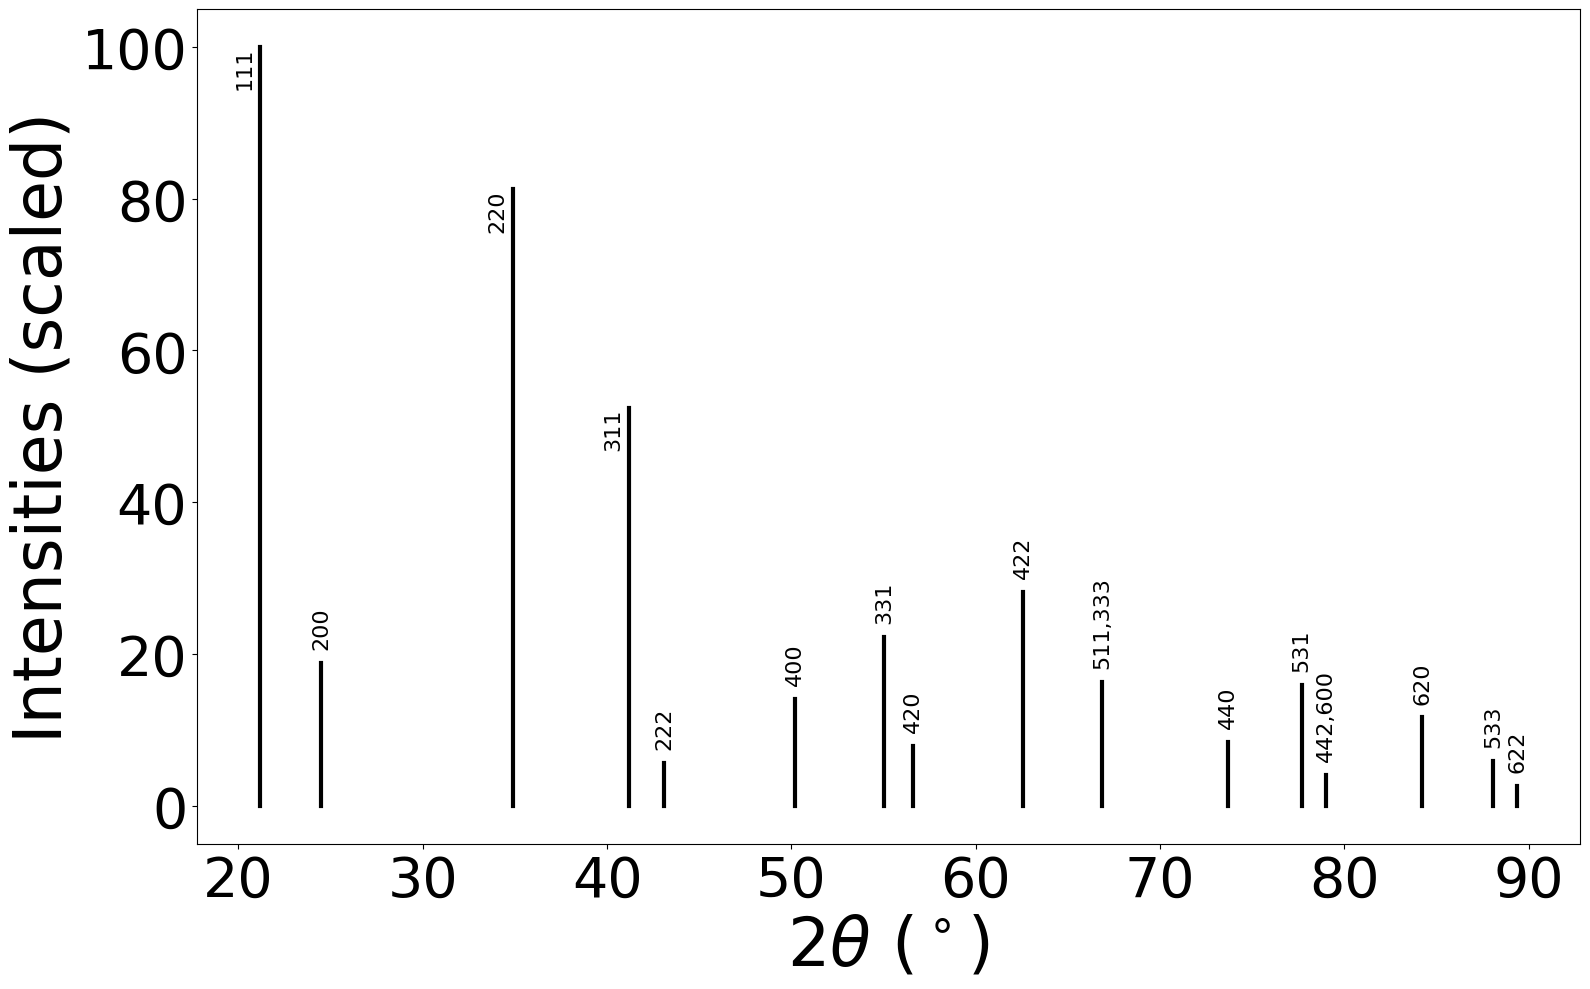

In [155]:
XRD.get_plot(conv_struc, )